<a href="https://colab.research.google.com/github/mzignis/hands_on_machine_learning/blob/master/artificial_neural_networks/introduction_to_ann_with_keras/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

sns.set()
sns.set_palette(sns.color_palette("Blues"))

In [39]:
HOME = '/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning/'
CWD = os.path.join(HOME, 'artificial_neural_networks/introduction_to_ann_with_keras')

%cd $CWD

/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning/artificial_neural_networks/introduction_to_ann_with_keras


In [0]:
california_housing_db = fetch_california_housing()

In [41]:
feature_names = california_housing_db.feature_names
X = california_housing_db.data

print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [42]:
y = california_housing_db.target

y.shape

(20640,)

array([37.88, 37.86, 37.85, ..., 39.43, 39.43, 39.37])

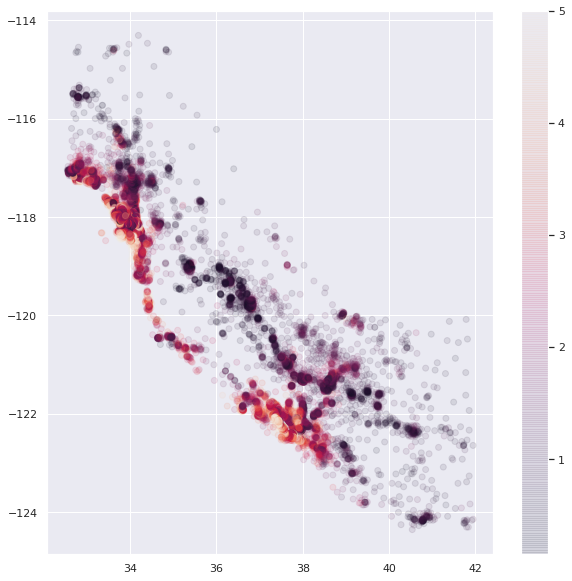

In [92]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, -2], X[:, -1], alpha=0.1, c=y)
plt.colorbar()

X[:, -2]

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [99]:
model = keras.Sequential([keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
                          keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train, X_train, epochs=20, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 567960641388802337009171431424.0000 - val_loss: 34781110770997991047168.0000
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 2419587328777446752256.0000 - val_loss: 14841346464415744.0000
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 1032458262806528.0000 - val_loss: 6305289728.0000
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 440896608.0000 - val_loss: 14947.8467
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 385619.9688 - val_loss: 30285.4082
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 385480.4062 - val_loss: 29344.4766
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 385329.2188 - val_loss: 28436.0254
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 386043.5938 - val_loss: 28540.4238
Epoch 9/20
363/363 [====================

In [105]:
X_new = X_test[1]
y_pred = model.predict(X_new)
print(y_pred)

ValueError: ignored